In [27]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('dataset_phishing.csv')

In [30]:
#testing
# Check the first few rows
print(df.head())
# Check for null values
print(df.isnull().sum())

# Display the columns in the dataset
print(df.columns)

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

In [33]:
# Convert all URLs to phishing = 1 and legitimate = 0
df['status'] = df['status'].apply(lambda x: 0 if x == 'legitimate' else 1)

In [35]:
# Check the distribution of labels
print(df['status'].value_counts())
# Fill missing numerical values with the mean of the respective column
#df = df.fillna(df.mean())

# Verify that no missing values remain
print(df.isnull().sum())

status
0    5715
1    5715
Name: count, dtype: int64
url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [37]:
from sklearn.preprocessing import StandardScaler

#Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#Split features and labels
X = df.iloc[:, 1:-1]
y = df['status']

#Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
#Training the dataset
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(X_train.shape, X_test.shape)

(9144, 87) (2286, 87)


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model to get feature importance
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

#Calculate and print the accuracy score, Confusion matrix, Recall, F1-Score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")
print(f"Recall:\n {recall_score(y_test, y_pred)}\n")
print(f"Precision:\n {precision_score(y_test, y_pred)}\n")
print(f"F1 Score:\n {f1_score(y_test, y_pred)}")

Accuracy: 0.968941382327209

Confusion Matrix:
 [[1128   29]
 [  42 1087]]

Recall:
 0.9627989371124889

Precision:
 0.9740143369175627

F1 Score:
 0.9683741648106904


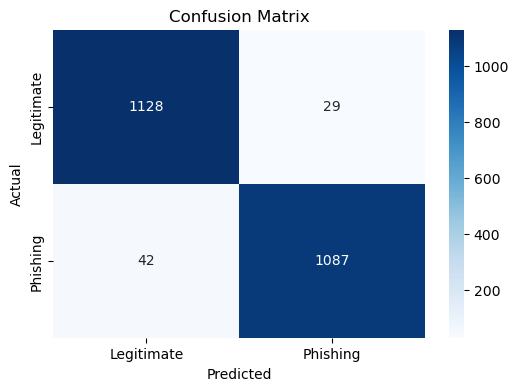

In [43]:
# Confusion Matrix Visualization
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

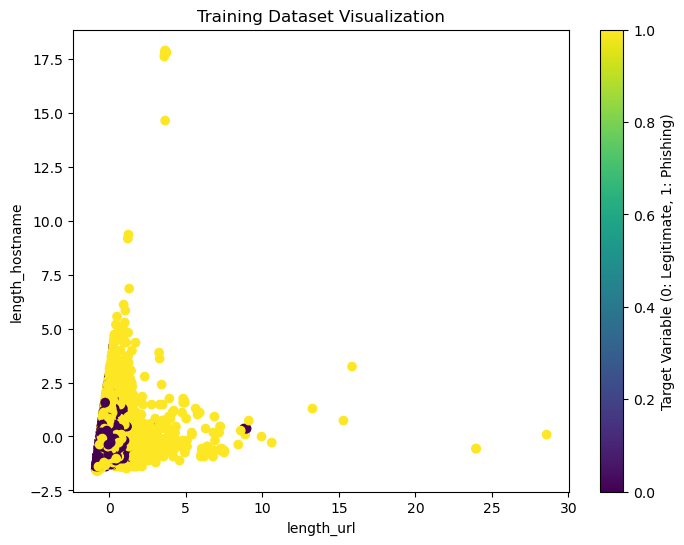

In [44]:
# prompt: for the above random forest code visualise the training dataset using scatter plot

import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')  # Adjust the column indices (0, 1) as needed
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Training Dataset Visualization')
plt.colorbar(label='Target Variable (0: Legitimate, 1: Phishing)')
plt.show()

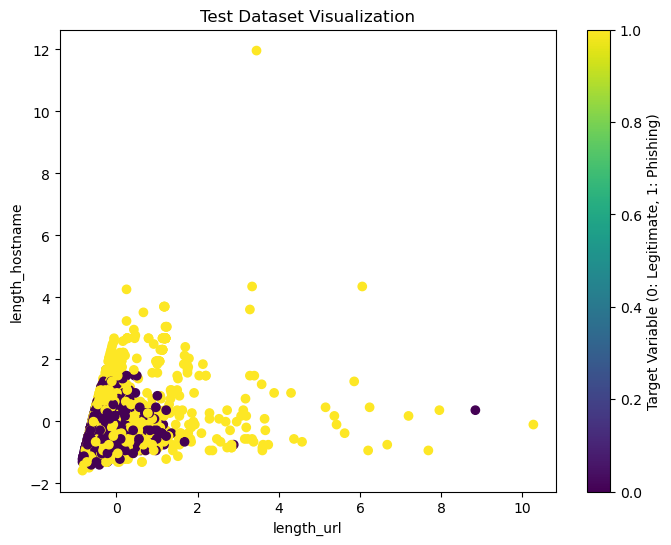

In [45]:
# prompt: for the above random forest code visualise the test dataset using scatter plot

# Assuming X_test and y_test are your testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')  # Adjust the column indices (0, 1) as needed
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Test Dataset Visualization')
plt.colorbar(label='Target Variable (0: Legitimate, 1: Phishing)')
plt.show()